### Scikit-learn을 이용한 머신러닝 학습 가이드!

- scikit-learn(sklearn)을 완전히 사용해서 end-to-end로 학습시키는 코드를 완성해봅니다!

- 너무나 유명한 california house pricing 데이터를 이용하여 회귀분석 예제 코드를 만들어봅시다.


> Data Load - Data Preprocessing - Fit - Evalution - Predict

In [1]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Load

In [2]:
# Hands-on!!
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame=True).data # X
y = fetch_california_housing(as_frame=True).target # y
print(X.shape, y.shape)

(20640, 8) (20640,)


In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

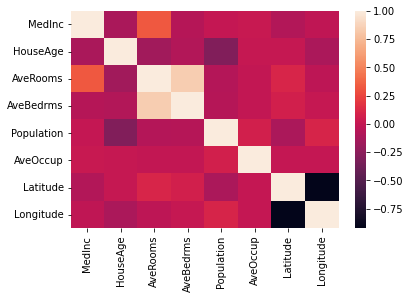

In [6]:
sns.heatmap(X.corr())

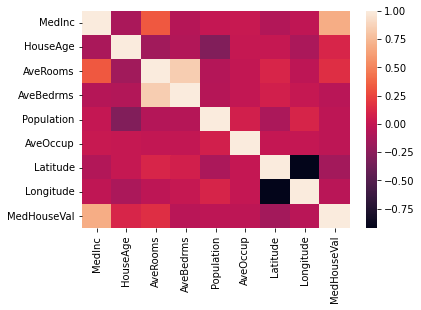

In [7]:
sns.heatmap(pd.concat([X,y], axis=1).corr())

### Data Preprocessing + EDA

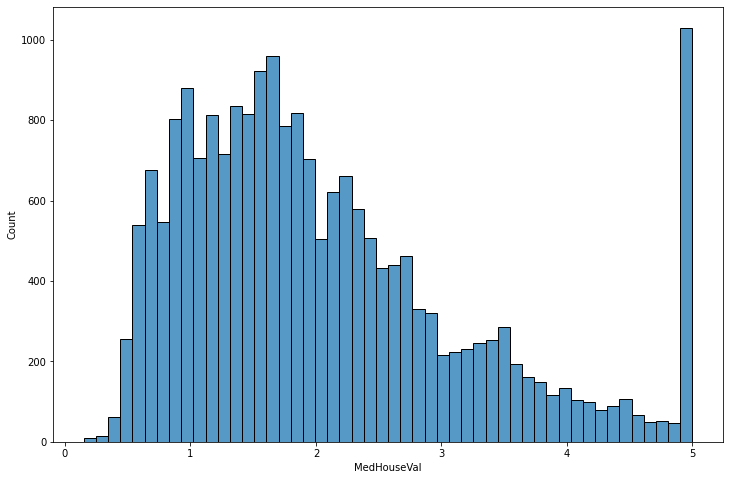

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 결측치 확인
#X.info()
X[X.isnull().any(axis=1)]

# 2. dtype이 object인 column이 있는지 확인 --> categorical feature를 확인하기 위해!

# 3. target distribution
plt.figure(figsize=(12, 8))
sns.histplot(y, bins=50)
plt.show()

In [9]:
## Train-test Split
from sklearn.model_selection import train_test_split

# 트테트테
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.25, random_state=0xC0FFEE) # 6:2:2 
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(12384, 8) (4128, 8) (4128, 8) (12384,) (4128,) (4128,)


### Training (Fit)

In [10]:
# 1. 사용할 함수를 불러옵니다.
from sklearn.linear_model import LinearRegression
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

# 2. 사용할 함수의 객체를 생성합니다.
reg = LinearRegression()
reg2 = LGBMRegressor()
reg3 = RandomForestRegressor()
# 3. 학습
reg.fit(X_train, y_train) ### Regression : supervised learning --> parameter update.
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

RandomForestRegressor()

### Evaluation

In [14]:
# 학습 결과를 확인 (평가 지표.)
## TO-DO Random forest에 대한 결과도 추가해서 출력해보세요
from sklearn.metrics import mean_squared_error, r2_score

pred = reg.predict(X_train) # y_hat
pred2 = reg2.predict(X_train)
pred3 = reg3.predict(X_train)
val_pred = reg.predict(X_val)
val_pred2 = reg2.predict(X_val)
val_pred3 = reg3.predict(X_val)

print("----- Training -----")
print("--- Linear Regression ---")
print("MSE : %.4f" % mean_squared_error(y_train, pred))
print("R2 : %.4f" % r2_score(y_train, pred))
print("\n\n--- LightGBM ---")
print("MSE : %.4f" % mean_squared_error(y_train, pred2))
print("R2 : %.4f" % r2_score(y_train, pred2))
print("\n\n--- RandomForestRegressor ---")
print("MSE : %.4f" % mean_squared_error(y_train, pred3))
print("R2 : %.4f" % r2_score(y_train, pred3))

print("\n\n----- Validation -----")
print("--- Linear Regression ---")
print("MSE : %.4f" % mean_squared_error(y_val, val_pred))
print("R2 : %.4f" % r2_score(y_val, val_pred))
print("\n\n--- LightGBM ---")
print("MSE : %.4f" % mean_squared_error(y_val, val_pred2))
print("R2 : %.4f" % r2_score(y_val, val_pred2))
print("\n\n--- RandomForestRegressor ---")
print("MSE : %.4f" % mean_squared_error(y_val, val_pred3))
print("R2 : %.4f" % r2_score(y_val, val_pred3))

----- Training -----
--- Linear Regression ---
MSE : 0.5336
R2 : 0.6045


--- LightGBM ---
MSE : 0.1475
R2 : 0.8907


--- RandomForestRegressor ---
MSE : 0.0374
R2 : 0.9723


----- Validation -----
--- Linear Regression ---
MSE : 0.5241
R2 : 0.5920


--- LightGBM ---
MSE : 0.2175
R2 : 0.8307


--- RandomForestRegressor ---
MSE : 0.2675
R2 : 0.7917


### Prediction

In [ ]:
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
print("--- Linear Regression ---")
print("MSE : %.4f" % mean_squared_error(y_test, result))
print("R2 : %.4f" % r2_score(y_test, result))
print("\n\n--- LightGBM ---")
print("MSE : %.4f" % mean_squared_error(y_test, result2))
print("R2 : %.4f" % r2_score(y_test, result2))

--- Linear Regression ---
MSE : 0.5005
R2 : 0.6224


--- LightGBM ---
MSE : 0.2106
R2 : 0.8411


In [ ]:
reg.coef_
reg.intercept_

-36.138493845650444